## Cancer Risk Prediction Model

### Decision Tree Classifier

#### Data Processing and Model Interaction

Used libraries: Pandas, NumPy, Scikit-learn, Matplotlib & Seaborn

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1: Load Data
def load_data(file_path):
    """Loads CSV dataset into a Pandas DataFrame."""
    return pd.read_csv(file_path)

#### Data Encoding:
- The Effect column was mapped to numerical values (Protective = 0, Negative = 1).
- Evidence Strength was mapped to ordinal values (Weak = 1, Moderate = 2, Strong = 3).
- Cancer Type was label-encoded for classification purposes.

In [10]:
# 2: Encode Categorical Columns
def encode_effect_strength(df):
    """Encodes 'Effect' and 'Evidence Strength' columns."""
    df['Effect'] = df['Effect'].map({'Protective': 0, 'Negative': 1})
    df['Evidence Strength'] = df['Evidence Strength'].map({'Weak evidence': 1, 'Moderate evidence': 2, 'Strong evidence': 3})
    return df

# 3: Encode 'Cancer Type'
def encode_cancer_type(df):
    """Encodes 'Cancer Type' as numerical labels."""
    label_encoder = LabelEncoder()
    df['Cancer Type'] = label_encoder.fit_transform(df['Cancer Type'])
    return df, label_encoder

#### Patient Profile Generation:
- Risk factors were aggregated into synthetic patient profiles, with multiple risk factors assigned to each patient.
- Aggregated numerical features such as effect and evidence strength were computed per patient.
- The final dataset included one-hot encoding of risk factors for model input.

In [8]:
# 4: Aggregate Risk Factors into Patient Profiles
def generate_patient_profiles(df, num_patients=1000, risk_factors_per_patient=4):
    """Creates synthetic patient profiles by randomly assigning multiple risk factors per patient."""
    unique_risk_factors = df['Risk Factor'].unique()
    patients = []
    
    for _ in range(num_patients):
        selected_risks = np.random.choice(unique_risk_factors, risk_factors_per_patient, replace=False)
        filtered_df = df[df['Risk Factor'].isin(selected_risks)]
        
        # Aggregate numerical features
        numeric_cols = ['Effect', 'Evidence Strength']
        patient_data = filtered_df.groupby('Cancer Type')[numeric_cols].mean().reset_index()

        # Keep Risk Factor as a concatenated string
        patient_data['Risk Factors'] = ", ".join(selected_risks)
        patient_data['Patient ID'] = _  
        
        patients.append(patient_data)
    
    return pd.concat(patients, ignore_index=True)

# 5: One-Hot Encode Risk Factors
def encode_risk_factors(df):
    """Encodes multiple risk factors per patient using multi-label binarization."""
    df['Risk Factors'] = df['Risk Factors'].apply(lambda x: x.split(', '))
    mlb = MultiLabelBinarizer()
    risk_factor_encoded = mlb.fit_transform(df['Risk Factors'])
    risk_factor_df = pd.DataFrame(risk_factor_encoded, columns=mlb.classes_)
    return pd.concat([df.drop(columns=['Risk Factors']), risk_factor_df], axis=1)

Model Training:
- A Decision Tree Classifier was trained using the processed data.
- The dataset was split into training (80%) and testing (20%) subsets.

Evaluation Metrics:
- Accuracy (Train & Test)
- Precision, Recall, and F1-score
- Classification Report

#### Model training

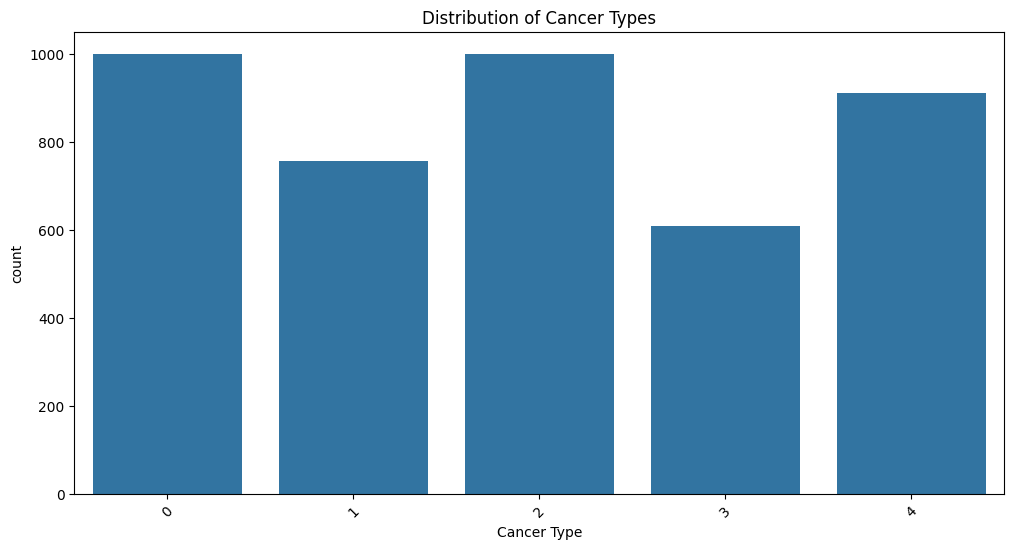

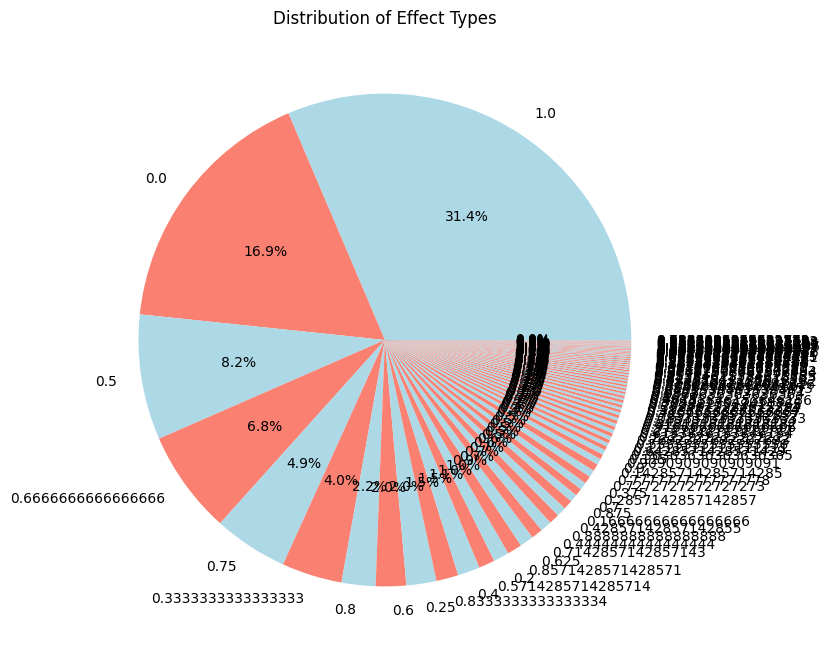

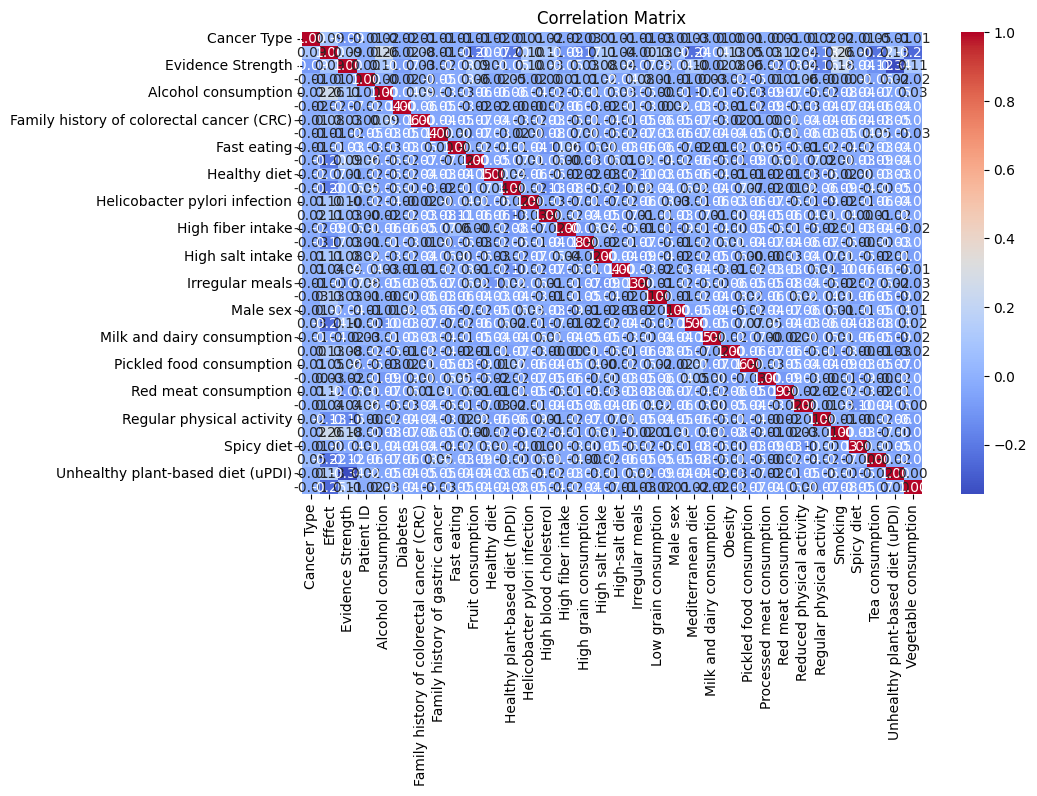

In [17]:
# 6: Train Decision Tree Model and Evaluate Metrics
def train_decision_tree(df):
    """Trains a Decision Tree classifier and returns the trained model along with evaluation metrics."""
    X = df.drop(columns=['Cancer Type', 'Patient ID'])
    y = df['Cancer Type']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    report = classification_report(y_test, y_test_pred)
    
    metrics = {
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Classification Report": report
    }
    
    return model, metrics

# 7: Visualizations
def visualize_data(df):
    """Generates visualizations including distribution plots and correlation matrix."""
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Cancer Type', data=df)
    plt.title("Distribution of Cancer Types")
    plt.xticks(rotation=45)
    plt.show()
    
    plt.figure(figsize=(8, 8))
    df['Effect'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'salmon'])
    plt.title("Distribution of Effect Types")
    plt.ylabel('')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix")
    plt.show()

# 8: Run the Entire Preprocessing Pipeline
def preprocess_pipeline(file_path):
    """Runs all preprocessing steps and returns the final DataFrame along with model metrics."""
    df = load_data(file_path)
    df = encode_effect_strength(df)
    df, label_encoder = encode_cancer_type(df)
    df = generate_patient_profiles(df)
    df = encode_risk_factors(df)
    visualize_data(df) 
    model, metrics = train_decision_tree(df)
    return df, model, metrics, label_encoder

df, model, metrics, label_enc = preprocess_pipeline("cancer prediction dataset - MY.csv")

**Patient Profile Dataset:**

In [18]:
df.head(20)

,Cancer Type,Effect,Evidence Strength,Patient ID,Alcohol consumption,Diabetes,Family history of colorectal cancer (CRC),Family history of gastric cancer,Fast eating,Fruit consumption,...,Pickled food consumption,Processed meat consumption,Red meat consumption,Reduced physical activity,Regular physical activity,Smoking,Spicy diet,Tea consumption,Unhealthy plant-based diet (uPDI),Vegetable consumption
0,0,0.800000,2.777778,0,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
1,2,0.600000,2.600000,0,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
2,4,0.000000,1.000000,0,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0.285714,2.833333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1.000000,1.000000,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,2,0.000000,2.500000,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,4,1.000000,1.000000,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0.000000,2.600000,2,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8,2,0.875000,2.625000,2,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9,4,1.000000,3.000000,2,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
for key, value in metrics.items():
    print(f"{key}: {value}")

Train Accuracy: 0.9192037470725996
Test Accuracy: 0.6381733021077284
Precision: 0.6387689258909193
Recall: 0.6381733021077284
F1 Score: 0.6380098086829427
Classification Report:               precision    recall  f1-score   support

           0       0.67      0.69      0.68       202
           1       0.59      0.62      0.61       133
           2       0.62      0.61      0.61       222
           3       0.65      0.67      0.66       116
           4       0.66      0.60      0.63       181

    accuracy                           0.64       854
   macro avg       0.64      0.64      0.64       854
weighted avg       0.64      0.64      0.64       854



***Classification Report analysis***:
- The model performs well on the training set but has a noticeable drop in accuracy on the test set. This suggests overfitting, where the model memorizes patterns in the training data but does not generalize well to unseen data.
- The precision and recall scores indicate moderate performance across different cancer types, with class imbalance potentially affecting results.

****Conclusion****

The cancer risk prediction model successfully classifies cancer types based on patient risk factors. 
However, the drop in test accuracy suggests that further optimization is needed.

### Decision Tree Classifier: Optimization

#### Hyperparameter tuning to optimize the decision tree depth and splitting criteria.

To improve the model’s accuracy and reduce overfitting, let's incorporate GridSearchCV for optimal hyperparameter selection.

In [53]:
# 6: Train Decision Tree Model and Evaluate Metrics
def train_decision_tree(df):
    """Trains a Decision Tree classifier and returns the trained model along with evaluation metrics."""
    X = df.drop(columns=['Cancer Type', 'Patient ID'])
    y = df['Cancer Type']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define hyperparameter grid
    param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.0001, 0.001, 0.01, 0.1]  # Cost-complexity pruning values
    }
    
    # Initialize and perform hyperparameter tuning
    model = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Get best model and retrain
    best_model = grid_search.best_estimator_
    
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    report = classification_report(y_test, y_test_pred)
    
    metrics = {
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Classification Report": report,
        "Best Parameters": grid_search.best_params_
    }
    
    return best_model, metrics

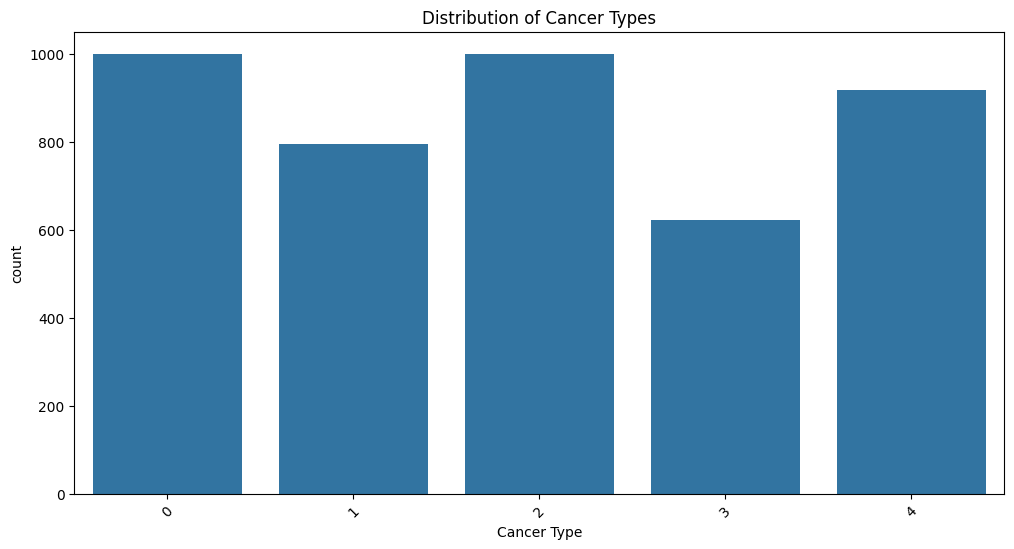

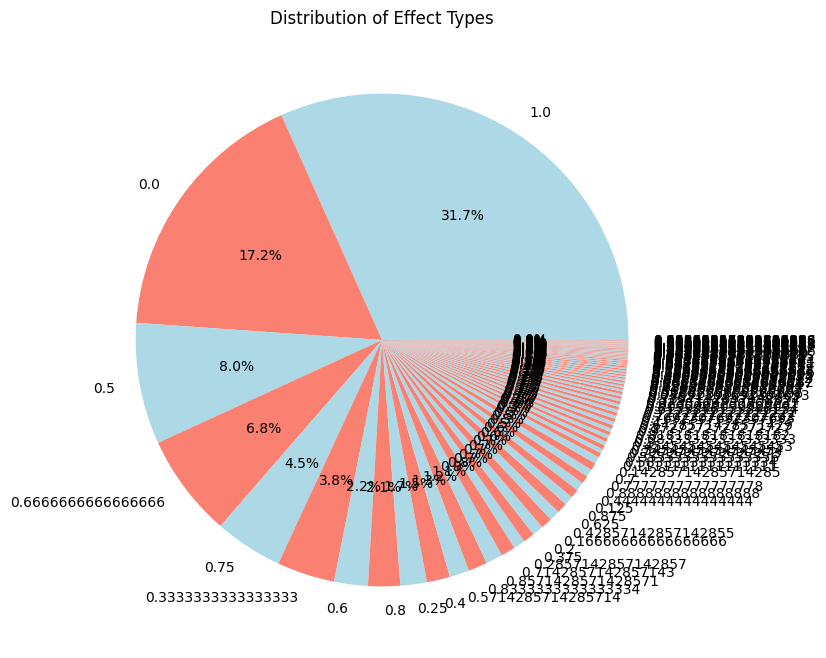

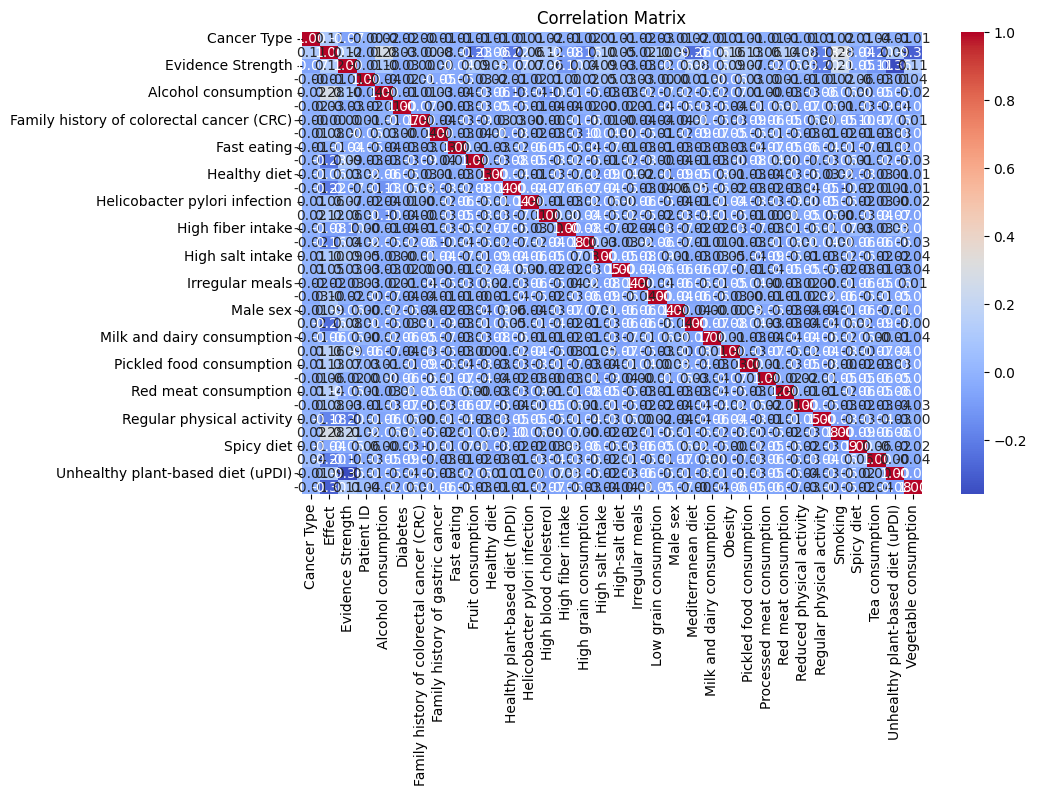

c:\users\user\appdata\local\programs\python\python311\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [56]:
model, metrics, label_enc = preprocess_pipeline("cancer prediction dataset - MY.csv")

In [55]:
for key, value in metrics.items():
    print(f"{key}: {value}")

Train Accuracy: 0.7368726428778648
Test Accuracy: 0.6867749419953596
Precision: 0.6982678875074362
Recall: 0.6867749419953596
F1 Score: 0.6803703696031681
Classification Report:               precision    recall  f1-score   support

           0       0.65      0.73      0.69       188
           1       0.78      0.62      0.69       180
           2       0.70      0.51      0.59       194
           3       0.62      0.99      0.76       129
           4       0.73      0.68      0.70       171

    accuracy                           0.69       862
   macro avg       0.69      0.71      0.69       862
weighted avg       0.70      0.69      0.68       862

Best Parameters: {'ccp_alpha': 0.001, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}


***Classification Report analysis***:
- Hyperparameter tuning has helped in balancing train and test accuracy, reducing overfitting. 
- However, the test accuracy (≈ 70%) still indicates room for improvement.

### Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Model with Hyperparameter Tuning
def train_random_forest(df):
    """
    Trains a Random Forest classifier using hyperparameter tuning and returns the trained model along with evaluation metrics.
    """
    X = df.drop(columns=['Cancer Type', 'Patient ID'])
    y = df['Cancer Type']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define hyperparameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],  # Number of trees in the forest
        'max_depth': [5, 10, None],  # Limit tree depth
        'min_samples_split': [2, 5, 10],  # Minimum samples to split
        'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf
    }
    
    # Initialize and perform hyperparameter tuning
    model = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get best model and retrain
    best_model = grid_search.best_estimator_
    
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    report = classification_report(y_test, y_test_pred)
    
    metrics = {
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Classification Report": report,
        "Best Parameters": grid_search.best_params_
    }
    
    return best_model, metrics


In [59]:
best_model, metrics = train_random_forest(df)
metrics

{'Train Accuracy': 0.8217213114754098,
 'Test Accuracy': 0.65807962529274,
 'Precision': np.float64(0.6611930238684998),
 'Recall': np.float64(0.65807962529274),
 'F1 Score': np.float64(0.6535810344526857),
 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.65      0.69      0.67       202\n           1       0.66      0.56      0.61       133\n           2       0.66      0.55      0.60       222\n           3       0.63      0.92      0.75       116\n           4       0.70      0.65      0.67       181\n\n    accuracy                           0.66       854\n   macro avg       0.66      0.68      0.66       854\nweighted avg       0.66      0.66      0.65       854\n',
 'Best Parameters': {'max_depth': None,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 100}}